In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
G = 9.81
DT = 0.1
E = 0.8

In [ ]:
class Nelikulmio:
  # A, B, C, D, A
  _coordinates = []
  _ref_coordinates = []

  _xcoords: list[list] = []
  _ycoords: list[list] = []

  _cm: list[list] = []

  _xcenters: list = []
  _ycenters: list = []

  _mass: float = 0.0
  _angle: float = 0.0

  _vx: float = 0.0
  _vy: float = 0.0

# Luo kulmion annetun pisteen ympärille
  def __init__(self,
               x: float,
               y: float,
               width: float,
               height: float,
               mass: float) -> None:
    self._coordinates = np.array([
      [x - width / 2, y + height / 2],
      [x - width / 2, y - height / 2],
      [x + width / 2, y - height / 2],
      [x + width / 2, y + height / 2]
      ])
    
    self._mass = mass

    self._cm = self._coordinates.mean(axis=0)

    self._ref_coordinates = self._coordinates - self._cm
  
  def update_position(self) -> None:
    x_1 = [x[0] for x in self._coordinates]
    y_1 = [y[1] for y in self._coordinates]

    x_1.append(x_1[0])
    y_1.append(y_1[0])

    self._xcoords.append(x_1)
    self._ycoords.append(y_1)

    self._cm = self._coordinates.mean(axis=0)

    self._xcenters.append(self._cm[0])
    self._ycenters.append(self._cm[1])

  # Pyöritetään muotoa asteiden mukaan
  def rotate(self, degrees: float):
    self._angle += degrees
    
    # Kääntömatriisin x transponoidun origo-koordinaattien transpoosi
    rotated_coords = (self.rotate_matrix() @ self._ref_coordinates.T).T

    # Päivitetään uudet koordinaatit lisäämällä origossa käännettyihin
    # pisteisiin massakeskipiste
    self._coordinates = rotated_coords + self._cm
  
  def rotate_matrix(self):
    return np.array([
      [np.cos(self._angle), -np.sin(self._angle)],
      [np.sin(self._angle), np.cos(self._angle)]
      ])

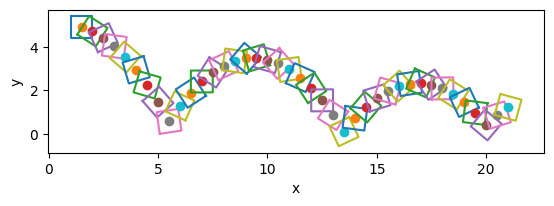

In [45]:
bingus = Nelikulmio(x=1.0, y=5.0, width=1.0, height=1.0, mass=1.0)

bingus._vx = 5.0

bounce: bool = False

while len(bingus._xcoords) < 40:
  # Käydään läpi kaikki y-pisteet
  for dot in bingus._coordinates:
    # Jos y-arvo on 0 tai vähemmän
    if dot[1] <= 0:
      bingus._vy = -bingus._vy * E
      bounce = True
      break
  
  if not bounce:
    bingus._vy = bingus._vy - G * bingus._mass * DT
  
  for i in bingus._coordinates:
    i[0] += bingus._vx * DT
    i[1] += bingus._vy * DT
  
  bounce = False

  bingus.update_position()
  bingus.rotate(10 * DT)


for i in range(len(bingus._xcoords)):
  plt.plot(bingus._xcoords[i], bingus._ycoords[i])
  plt.plot(bingus._xcenters[i], bingus._ycenters[i], "o")

plt.gca().set_aspect("equal")

plt.xlabel("x")
plt.ylabel("y")
plt.show()
